In [11]:
from random import shuffle
import glob
import tensorflow as tf
from sklearn.externals import joblib
import numpy as np
from sklearn import preprocessing
import uuid
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation
import sys
from os import listdir
from os.path import isfile, join
import os
import matplotlib.pyplot as plt
import cv2
import keras

from keras.callbacks import Callback
from keras.callbacks import EarlyStopping, TensorBoard, ReduceLROnPlateau
from keras import backend as K
from keras import layers
from keras.layers import Dense, Conv2D, BatchNormalization, Activation
from keras.layers import AveragePooling2D, Input, Flatten, Dropout
from tensorflow.keras.preprocessing.image import random_shift, random_zoom, random_rotation

import keras

from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2
from keras import backend as K

In [14]:
tf.test.is_built_with_cuda()

False

In [13]:
!pip install --user --no-warn-script-location --ignore-installed --upgrade tensorflow-gpu

  Could not find a version that satisfies the requirement tensorflow-gpu==1.10 (from versions: 1.13.0rc1, 1.13.0rc2, 1.13.1, 1.13.2, 1.14.0rc0, 1.14.0rc1, 1.14.0, 2.0.0a0, 2.0.0b0, 2.0.0b1)
No matching distribution found for tensorflow-gpu==1.10


In [23]:
dir_parts = r'C:\\Users\\Mihail\\capcha_letters_1'
onlyfiles = [f for f in listdir(dir_parts) if isfile(join(dir_parts, f))]

In [24]:
onlyfiles[0]

't_1_0a11c7a5-1027-4a2d-8949-f1b25ca8012f.jpg'

In [25]:
600*5*150

450000

In [26]:
image = cv2.imread(dir_parts+'//'+onlyfiles[0])

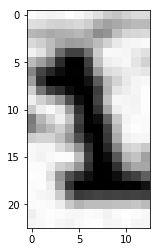

In [27]:
plt.imshow(image)

In [6]:
image.shape

(22, 10, 3)

In [133]:
wrap = cv2.copyMakeBorder(image,2,2,2,2,cv2.BORDER_WRAP)
#constant= cv2.copyMakeBorder(image,5,10,5,10,cv2.BORDER_CONSTANT, value=[image.mean(), image.mean(), image.mean()])
replicate = cv2.copyMakeBorder(image,2,2,7,7,cv2.BORDER_REPLICATE)

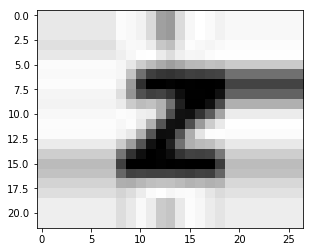

In [134]:
plt.imshow(replicate)

In [9]:
width = 0
height = 0
for i in onlyfiles:
    image = cv2.imread(dir_parts+'//'+i)
    if width < image.shape[1]:
        width = image.shape[1]
    if height < image.shape[0]:
        height = image.shape[0]  

In [10]:
im_shape = np.max([width, height])

In [11]:
def add_constant(image):
    a=b=c=d=0
    if image.shape[0] < im_shape:
        a = (im_shape - image.shape[0]) // 2
        if (im_shape - image.shape[0]) % 2 > 0:
            b = (im_shape - image.shape[0]) // 2 + 1
        else:
            b = (im_shape - image.shape[0]) // 2

    if image.shape[1] < im_shape:
        c = (im_shape - image.shape[1]) // 2
        if (im_shape - image.shape[1]) % 2 > 0:
            d = (im_shape - image.shape[1]) // 2 + 1
        else:
            d = (im_shape - image.shape[1]) // 2
    constant= cv2.copyMakeBorder(image,a ,b , c, d,cv2.BORDER_CONSTANT, value=[image.mean(), image.mean(), image.mean()])
    return(constant)


In [ ]:
for i in onlyfiles:
    image = cv2.imread(dir_parts+'//'+i)
    add_constant(image)
    
    plt.imsave(os.path.join('C:\\Users\\Mihail\\capcha_letters_onesize',i), add_constant(image), cmap = plt.cm.gray)

In [12]:
dir_parts_onesize = r'C:\\Users\\Mihail\\capcha_letters_onesize'
onlyfiles_onesize = [f for f in listdir(dir_parts_onesize) if isfile(join(dir_parts_onesize, f))]

In [ ]:
for i in onlyfiles_onesize:
    image = cv2.imread(dir_parts_onesize+'//'+i)
    print(image.shape)
    

In [13]:
classes = []
for i in onlyfiles_onesize:
    classes.append(i[2])

classes = list(set(classes))


In [64]:
len(classes)

55

In [257]:
def train_preprocess(image):   

    new = random_rotation(
        image,
        10,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    new=random_shift(
        new,
        0.2,
        0.2,
        row_axis=0,
        col_axis=1,
        channel_axis=2,
        fill_mode='nearest',
        cval=0.0,
        interpolation_order=1
    )

    # Other transformations...
    return new

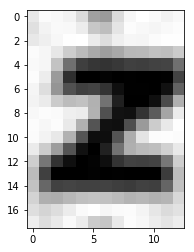

In [192]:
plt.imshow(image)

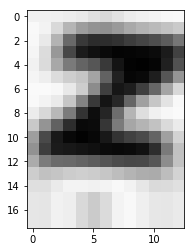

In [265]:
plt.imshow(train_preprocess(image))

In [18]:
dir_parts_onesize = r'C:\\Users\\Mihail\\capcha_letters_onesize'
onlyfiles_onesize 

['t_1_0017bb82-13c2-466a-a5d8-e607ccbc8fe6.jpg',
 't_1_04b1d25a-ef0b-429b-bbd0-261cb9a3c17a.jpg',
 't_1_050a2b79-ea7f-4474-a8e3-88000fcb2ac1.jpg',
 't_1_06b4b5ff-0c24-43e5-a981-8974d8350c4d.jpg',
 't_1_0e1868b6-f5ff-4853-a3ae-a9004aa220e4.jpg',
 't_1_0f39c9a9-0308-4a22-8fc4-92789d271271.jpg',
 't_1_19e67a80-fc0f-42e0-8aca-687d7da0aaa9.jpg',
 't_1_23139c0a-7142-4d60-adbe-47eee2c610dc.jpg',
 't_1_273c83c1-c2ba-4fa9-aeae-d424c92792d9.jpg',
 't_1_2ffc816d-f437-470d-9ed8-2223df0968b5.jpg',
 't_1_3d3eb38b-2a84-455d-9995-8349401f974b.jpg',
 't_1_44d5df7e-4034-41b7-8769-f67565871149.jpg',
 't_1_52dd51cc-a5dc-4faa-bd20-7b1ae3b3d8f1.jpg',
 't_1_5720f2e6-a2c4-4129-a92c-6dfe21ad9bf7.jpg',
 't_1_58553a09-dcd7-43bb-aad5-452bce9cb019.jpg',
 't_1_5d403730-db6e-435f-808b-3fdbe42fe3f9.jpg',
 't_1_5dae7d13-4593-4ed4-8458-a818ff30ebad.jpg',
 't_1_606c5cd6-90e8-4119-b875-42ed2832d52a.jpg',
 't_1_69848967-a3d6-4a67-b08f-a9ed8a889cb9.jpg',
 't_1_7734f870-8155-41b4-bd46-d0196ea1a21f.jpg',
 't_1_7bffe1c3-3ae8-

In [ ]:
augmented_path = r'C:\Users\Mihail\augmented'

In [ ]:
'''for file_name in onlyfiles_onesize:

    image = cv2.imread(os.path.join(dir_parts_onesize,file_name))
    
    print(file_name)

    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #image = cv2.resize(image, (40, 40))

    plt.imsave(os.path.join(augmented_path, file_name), image , cmap = plt.cm.gray)

    image = image.reshape([image.shape[0], image.shape[1],1])

    for i in np.arange(250):
        new = train_preprocess(image)
        new = new.reshape([new.shape[0], new.shape[1]])
        plt.imsave(os.path.join(augmented_path,'{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)'''

In [ ]:
j = 0
for file_name in onlyfiles_onesize:

    image = cv2.imread(os.path.join(dir_parts_onesize,file_name))
    
    print(file_name)

    image=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    #image = cv2.resize(image, (40, 40))

    #plt.imsave(os.path.join(augmented_path, file_name), image , cmap = plt.cm.gray)

    image = image.reshape([image.shape[0], image.shape[1],1])

    for i in np.arange(50):
        new = train_preprocess(image)
        new = new.reshape([new.shape[0], new.shape[1]])
        if j % 3 == 0:
            plt.imsave(os.path.join(r'C:\Users\Mihail\test_im','{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)
        else:
             plt.imsave(os.path.join(r'C:\Users\Mihail\train_im','{}_{}.jpg'.format(file_name[:3],uuid.uuid4())), new , cmap = plt.cm.gray)
    j += 1                            


In [19]:
onlyfiles_train = [f for f in listdir(r'C:\Users\Mihail\train_im') if isfile(join(r'C:\Users\Mihail\train_im', f))]
onlyfiles_test = [f for f in listdir(r'C:\Users\Mihail\test_im') if isfile(join(r'C:\Users\Mihail\test_im', f))]

In [20]:
y_train = []
for i in onlyfiles_train:
    y_train.append(i[2])
    
y_test = []
for i in onlyfiles_test:
    y_test.append(i[2])

In [84]:
y_train[0]

tensor(0)

In [90]:
def _parse_function(filename, label):
  image_string = tf.read_file(filename)
  image_decoded = tf.image.decode_jpeg(image_string)
  image_resized = tf.image.resize_images(image_decoded, [28, 28])
  return image_resized, label

In [92]:
_parse_function(r'C:\Users\Mihail\train_im' + '\\' + onlyfiles_train[0], y_train[0])[0]

<tf.Tensor 'resize_3/Squeeze:0' shape=(28, 28, ?) dtype=float32>

In [118]:
_parse_function(filenames[0], y_train[0])

(<tf.Tensor 'resize_5/Squeeze:0' shape=(28, 28, ?) dtype=float32>, tensor(0))

In [115]:
filenames = []
for i in onlyfiles_train:
    filenames.append(r'C:\Users\Mihail\train_im' + '\\' + i)

In [123]:
filenames[0]

'C:\\Users\\Mihail\\train_im\\t_1_002ec520-528f-429c-8c38-c495827c8ab3.jpg'

In [107]:
filenames = tf.constant([filenames])

In [128]:
labels = tf.constant(y_train)

In [130]:
dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
dataset = dataset.map(_parse_function)

In [131]:
dataset

<DatasetV1Adapter shapes: ((28, 28, ?), ()), types: (tf.float32, tf.int64)>

In [ ]:
# A vector of filenames.
filenames = tf.constant(["/var/data/image1.jpg", "/var/data/image2.jpg", ...])

# `labels[i]` is the label for the image in `filenames[i].
labels = tf.constant([0, 37, ...])

dataset = tf.data.Dataset.from_tensor_slices((filenames, labels))
dataset = dataset.map(_parse_function)

In [83]:
r'C:\Users\Mihail\train_im' + '\\' + onlyfiles_train[0]

'C:\\Users\\Mihail\\train_im\\t_1_002ec520-528f-429c-8c38-c495827c8ab3.jpg'

In [ ]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(45):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

In [ ]:
def cnn_layers(x_train_input):
1    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(x_train_input)
2    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
3    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
4    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x_train_out = layers.Dense(NUM_CLASSES,
                               activation='softmax',
                               name='x_train_out')(x)
    return x_train_out

In [5]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [56]:
'''class model(torch.nn.Module):
    def __init__(self):
        super(model, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, 55)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
model = model()'''

In [58]:
class LeNet5(torch.nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        
        self.conv1 = torch.nn.Conv2d(
            in_channels=3, out_channels=6, kernel_size=5, padding=2)
        self.act1  = torch.nn.ReLU()
        self.pool1 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
       
        self.conv2 = torch.nn.Conv2d(
            in_channels=6, out_channels=16, kernel_size=5, padding=0)
        self.act2  = torch.nn.ReLU()
        self.pool2 = torch.nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.fc1   = torch.nn.Linear(5 * 5 * 16, 120)
        self.act3  = torch.nn.ReLU()
        
        self.fc2   = torch.nn.Linear(120, 84)
        self.act4  = torch.nn.ReLU()
        
        self.fc3   = torch.nn.Linear(84, len(classes))
        
        #self.sm = torch.nn.Softmax(dim=1)
    
    def forward(self, x):
        
        x = self.conv1(x)
        x = self.act1(x)
        x = self.pool1(x)
        
        x = self.conv2(x)
        x = self.act2(x)
        x = self.pool2(x)
        
        x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))

        x = self.fc1(x)
        x = self.act3(x)
        x = self.fc2(x)
        x = self.act4(x)
        x = self.fc3(x)
        
        return x
    
    def inference(self, x):
        x = self.forward(x)
        x = self.sm(x)
        return x
    
lenet5 = LeNet5()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

In [24]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1.0e-3)

NameError: name 'model' is not defined

In [26]:
X_train = []
for i in onlyfiles_train:
    e = cv2.imread(r'C:\Users\Mihail\train_im'+'\\'+i)
    e.resize(3, 28, 28)
    X_train.append(e)

In [27]:
X_test = []
for i in onlyfiles_test:
    e = cv2.imread(r'C:\Users\Mihail\test_im'+'\\'+i)
    e.resize(3, 28, 28)
    X_test.append(e)

In [28]:
X_train = torch.tensor(X_train)
X_test = torch.tensor(X_test)

In [29]:
X_train.shape

torch.Size([75500, 3, 28, 28])

In [30]:
X_test.shape

torch.Size([37750, 3, 28, 28])

In [41]:
X_train = X_train.type('torch.FloatTensor')
X_test = X_test.type('torch.FloatTensor')

In [31]:
le = preprocessing.LabelEncoder()

In [32]:
le.fit(y_train)

LabelEncoder()

In [33]:
le.classes_

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D',
       'E', 'F', 'G', 'H', 'J', 'K', 'M', 'N', 'P', 'Q', 'R', 'S', 'T',
       'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g',
       'h', 'j', 'k', 'm', 'n', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w',
       'x', 'y', 'z'], dtype='<U1')

In [34]:
y_test = torch.tensor(le.transform(y_test))

In [35]:
y_train = torch.tensor(le.transform(y_train))

In [36]:
y_test.shape

torch.Size([37750])

In [37]:
y_train.shape

torch.Size([75500])

In [38]:
X_test.shape

torch.Size([37750, 3, 28, 28])

In [67]:
X_train.shape

torch.Size([75500, 3, 28, 28])

In [57]:
'''batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(10000):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = torch.tensor(le.transform(y_train)).to(device)
        
        preds = model.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = model.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)'''

ValueError: y contains previously unseen labels: [0, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54]

In [62]:
#device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')
lenet5 = lenet5.to(device)

In [25]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [132]:
batch_size = 1

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(45):
    order = np.random.permutation(len(X_train))
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = lenet5.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()
        
    test_preds = lenet5.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).data.cpu())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
    test_accuracy_history.append(accuracy)
    
    print(accuracy)

RuntimeError: $ Torch: not enough memory: you tried to allocate 8GB. Buy new RAM! at ..\aten\src\TH\THGeneral.cpp:201

In [ ]:
def cnn_layers(x_train_input):
    x = layers.Conv2D(32, (3, 3),
                      activation='relu', padding='valid')(x_train_input)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Conv2D(64, (3, 3), activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)
    x = layers.Flatten()(x)
    x = layers.Dense(512, activation='relu')(x)
    x = layers.Dropout(0.5)(x)
    x_train_out = layers.Dense(NUM_CLASSES,
                               activation='softmax',
                               name='x_train_out')(x)
    return x_train_out

In [ ]:
epochs = 15
capacity = 10000
min_after_dequeue = 3000
enqueue_many = True
NUM_CLASSES = len(classes)
SUM_OF_ALL_DATASAMPLES=100000
BATCHSIZE=128
STEPS_PER_EPOCH= SUM_OF_ALL_DATASAMPLES / BATCHSIZE
w, h = 40,40


In [ ]:
with tf.device('/gpu:0'):
    K.clear_session()
    config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 5} ) 
    sess = tf.Session(config=config) 
    K.set_session(sess)
    #Get your datatensors
    filepath=[r'C:\Users\Mihail\augmented']
    image, label = create_dataset(filepath)

    model_input = layers.Input(tensor=image)
    model_output = cnn_layers(model_input)
    train_model = keras.models.Model(inputs=model_input, outputs=model_output)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    #Compile your model
    train_model.compile(optimizer=keras.optimizers.RMSprop(lr=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'],
                       target_tensors=[label])


    filepath_test=[r'D:\tfrecords\test_1.tfrecords']
    #Get your datatensors
    image_test, label_test = create_dataset(filepath_test)

    model_input_test = layers.Input(tensor=image_test)
    model_output_test = cnn_layers(model_input_test)
    test_model = keras.models.Model(inputs=model_input_test, outputs=model_output_test)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'],
                        target_tensors=[label_test])


   #Train the model
    train_model.fit(epochs=epochs,
                    steps_per_epoch=100, callbacks=[EvaluateInputTensor(test_model, steps=100),
                                                   TensorBoard(
                            log_dir=os.path.join(r'D:\tfrecords\logs','tb_'.format(0))
                                                        , histogram_freq=0
                                                        , batch_size=32, write_graph=False
                                                        , write_grads=False, write_images=False
                                                       , embeddings_freq=0, embeddings_layer_names=None
                                                        , embeddings_metadata=None, embeddings_data=None)
                                                   
                                                   
                                                   ])

    train_model.save_weights(r'D:\tfrecords\weights\saved_wt.h5')



In [ ]:
with tf.device('/gpu:0'):
    K.clear_session()
    config = tf.ConfigProto( device_count = {'GPU': 1 , 'CPU': 5} ) 
    sess = tf.Session(config=config) 
    K.set_session(sess)
    #Get your datatensors
    def create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=50000):
    
        # This works with arrays as well
        dataset = tf.data.TFRecordDataset(filepath)

        # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
        dataset = dataset.map(_parse_function, num_parallel_calls=4)

        # This dataset will go on forever
        dataset = dataset.repeat().shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)


        # Create an iterator
        iterator = dataset.make_one_shot_iterator()

        # Create your tf representation of the iterator
        image, label = iterator.get_next()

        # Bring your picture back in shape

        image = tf.reshape(image, [-1, 40, 40, 1])

        # Create a one hot array for your labels
        label = tf.one_hot(label, NUM_CLASSES)

        return image, label
    
    def lr_schedule(epoch):

        lr = 1e-3
        if epoch > 30:
            lr *= 0.5e-3
        elif epoch > 22:
            lr *= 1e-3
        elif epoch > 15:
            lr *= 1e-2
        elif epoch > 8:
            lr *= 1e-1
        print('Learning rate: ', lr)
        return lr

    lr_scheduler = LearningRateScheduler(lr_schedule)

    lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                                   cooldown=0,
                                   patience=5,
                                   min_lr=0.5e-6)

    filepath=[r'C:\Users\Mihail\augmented']
    image, label = create_dataset(filepath)

 
    train_model = resnet_v1(image, 20, num_classes=NUM_CLASSES)


    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    #Compile your model
    train_model.compile(optimizer=Adam(lr=lr_schedule(0)),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'],
                       target_tensors=[label])


    filepath_test=[r'C:\Users\Mihail\augmented']
    #Get your datatensors
    image_test, label_test = create_dataset(filepath_test)

        

    test_model = resnet_v1(image_test,20, num_classes=NUM_CLASSES)

    # Pass the target tensor `y_train_batch` to `compile`
    # via the `target_tensors` keyword argument:
    test_model.compile(optimizer=keras.optimizers.RMSprop(lr=2e-3, decay=1e-5),
                        loss='categorical_crossentropy',
                        metrics=['accuracy'],
                        target_tensors=[label_test])


   #Train the model
    train_model.fit(epochs=epochs,
                    steps_per_epoch=STEPS_PER_EPOCH, callbacks=[EvaluateInputTensor(test_model, steps=150),
                                                   TensorBoard(
                            log_dir=os.path.join(r'D:\tfrecords\logs','tb_'.format(0))
                                                        , histogram_freq=0
                                                        , batch_size=32, write_graph=False
                                                        , write_grads=False, write_images=False
                                                       , embeddings_freq=0, embeddings_layer_names=None
                                                        , embeddings_metadata=None, embeddings_data=None),
                                                    lr_scheduler
                                                    ,lr_reducer
                                                   ])

    train_model.save_weights(r'D:\tfrecords\weights\saved_wt.h5')



In [ ]:
import torch

In [ ]:
MNIST_train[1]

In [ ]:
addrs = glob.glob(r'C:\Users\Mihail\augmented')

In [ ]:
le = preprocessing.LabelEncoder()

In [ ]:
le.fit(labels_basic)

In [ ]:
from keras.models import Sequential

In [ ]:
train_class = [f[2] for f in listdir(r'C:\Users\Mihail\train_im') if isfile(join(r'C:\Users\Mihail\train_im', f))]

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Mihail\train_im',
        target_size=(150, 150),
        batch_size=32,
        classes=classes, class_mode='categorical',)

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        r'C:\Users\Mihail\augmented',
        target_size=(150, 150),
        batch_size=32,
        classes=classes, class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        r'C:\Users\Mihail\augmented',
        target_size=(150, 150),
        batch_size=32,
        classes=classes, class_mode='categorical')



model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


In [ ]:
validation_generator.class_indices

In [ ]:
def _parse_function(proto):
    # define your tfrecord again. Remember that you saved your image as a string.
    keys_to_features = {'image': tf.FixedLenFeature([], tf.string),
                        'label': tf.FixedLenFeature([], tf.int64)}
    
    # Load one example
    parsed_features = tf.parse_single_example(proto, keys_to_features)
    
    # Turn your saved image string into an array
    parsed_features['image'] = tf.decode_raw(parsed_features['image'], tf.float32)
    
    parsed_features['image'] = tf.reshape(parsed_features['image'], [-1, h, w, 1])
    parsed_features['label'] = tf.cast(parsed_features['label'],  tf.int64)
    
    return parsed_features['image'], parsed_features['label']

In [ ]:
def create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=50000):

    # This works with arrays as well
    dataset = tf.data.TFRecordDataset(filepath)

    # Maps the parser on every filepath in the array. You can set the number of parallel loaders here
    dataset = dataset.map(_parse_function, num_parallel_calls=4)

    # This dataset will go on forever
    dataset = dataset.repeat().shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE)


    # Create an iterator
    iterator = dataset.make_one_shot_iterator()

    # Create your tf representation of the iterator
    image, label = iterator.get_next()

    # Bring your picture back in shape

    image = tf.reshape(image, [-1, 27, 23, 1])

    # Create a one hot array for your labels
    label = tf.one_hot(label, NUM_CLASSES)

    return image, label

In [ ]:
image.shape

In [ ]:
q = create_dataset(filepath,BATCH_SIZE=128,SHUFFLE_BUFFER=50000)

In [ ]:
tf.reshape(image, [-1, 23, 27, 1])